### Models X | created 26/6/2022
> This notebook was created with the goal of the computational analysis of the spot properties output of the Opera.

In [1]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import __version__ as sk__version__

print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__,
      "\nstatsmodels", sm.__version__,
      "\nsklearn", sk__version__)

python 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)] 
numpy 1.22.4 
pandas 1.4.2 
plotnine 0.8.0 
statsmodels 0.13.2 
sklearn 1.1.1


In [2]:
def opera_to_df(input):
    # Import Tab separated opera file
    raw_df = pd.read_csv(input, sep = '\t', skiprows = 9)
    raw_df = raw_df.dropna(axis = 'columns')
    return raw_df

In [46]:
ar_coloc = opera_to_df('data/0206_assay_redo/input_data/Objects_Population - coloc AR.txt')
ar_wt_pos = ar_coloc[ar_coloc['Column'] == 8]
ar_c4_pos = ar_coloc[ar_coloc['Column'] == 6]

In [4]:
pcna_coloc = opera_to_df('data/0206_assay_redo/input_data/Objects_Population - coloc PCNA.txt')
pcna_wt_pos = pcna_coloc[pcna_coloc['Column'] == 8]

In [48]:
ar_wt_pos.to_csv('data/0206_assay_redo/input_data/readable_ar_wt_coloc.csv')
ar_c4_pos.to_csv('data/0206_assay_redo/input_data/readable_ar_c4_coloc.csv')

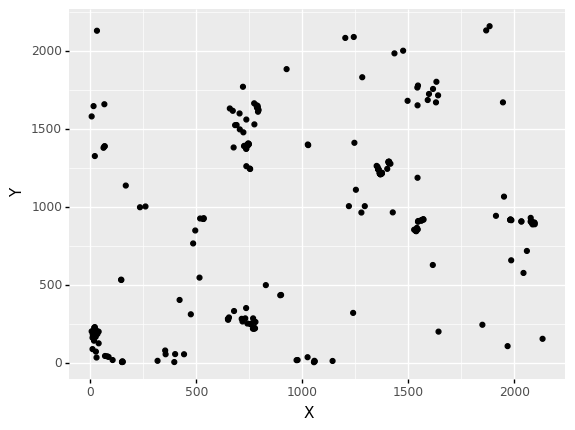

<ggplot: (142591666738)>

In [8]:
ggplot(ar_wt_pos, aes('X', 'Y')) + \
    geom_point()

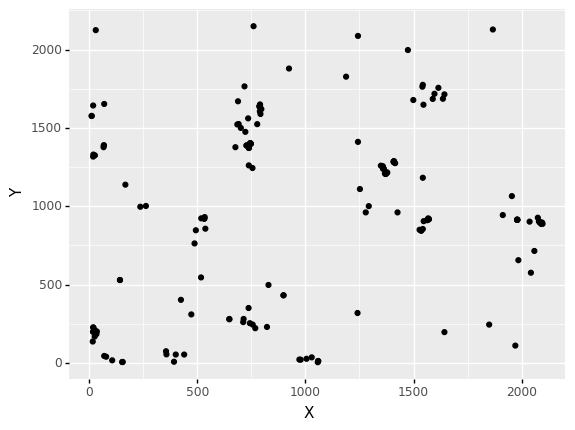

<ggplot: (142592893631)>

In [7]:
ggplot(pcna_wt_pos, aes('X', 'Y')) + \
    geom_point()

In [43]:
trc = pd.read_csv('data/0206_assay_redo/cep.txt')
ls_trc = []

with open('data/0206_assay_redo/cep.txt') as f:
    for line in f:
        ls_trc.append(int(line))

In [44]:

ar_wt_pos['trc'] = ls_trc
ar_wt_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 3352 to 3578
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Row                                          227 non-null    int64  
 1   Column                                       227 non-null    int64  
 2   Plane                                        227 non-null    int64  
 3   Timepoint                                    227 non-null    int64  
 4   Field                                        227 non-null    int64  
 5   Object No                                    227 non-null    int64  
 6   X                                            227 non-null    int64  
 7   Y                                            227 non-null    int64  
 8   Bounding Box                                 227 non-null    object 
 9   Position X [µm]                              227 non-null    float64
 10

C:\Users\acher\AppData\Local\Temp\ipykernel_16516\3304196369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


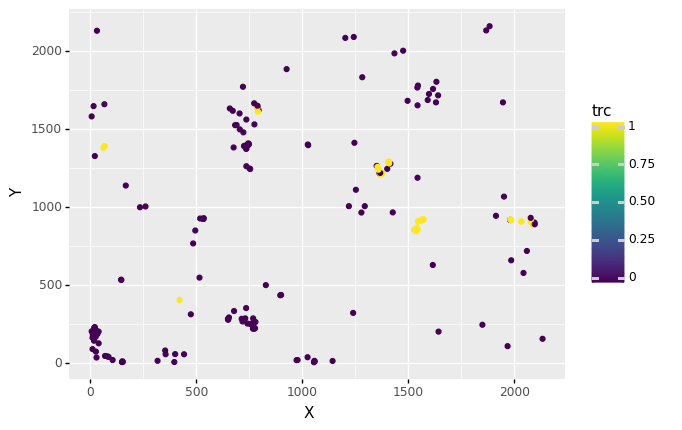

<ggplot: (142601145092)>

In [45]:
ggplot(ar_wt_pos, aes('X', 'Y', color = 'trc')) + \
    geom_point()